In [7]:
#importing libraries
import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [12]:
#reading the file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
#checking columns
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
#cheking null values, 0 null values found
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
df.shape

(8124, 23)

In [16]:
#checking the data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [18]:
#describe shows all the data present in the columns are alphabets and not numbers which only shows the total count of rows present, the unique number of categories present in each column, the top/highest number of letter present in those columns and finally the frequency/number of times the top alphabet is present in the column.

#Since the object data is not going to provide any kind of insight we will need to change these object data into numerical form but to do that we need to first understand what these letters/alphabets represent.

In [19]:
# Checking the label(class) column for any imbalance in target label 'class'

count = df['class'].value_counts('e','p') * 100
count # This gives us the percentage of number of poisonous class divided by the entire class data

e    51.797144
p    48.202856
Name: class, dtype: float64

In [20]:
#total 100, data is not imbalanced. No need to be treated

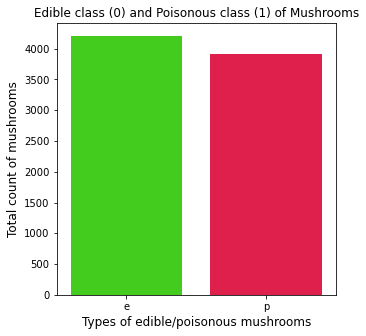

In [22]:
#visulaisation
count = df['class'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=1.0, palette="prism")
plt.ylabel('Total count of mushrooms', fontsize=12) # Number of rows with categorical values
plt.xlabel('Types of edible/poisonous mushrooms', fontsize=12) # 
plt.title('Edible class (0) and Poisonous class (1) of Mushrooms')
plt.show()

In [23]:
#EDA - label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier




In [27]:
conversion = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    conversion_dict = {index: label for index, label in enumerate(encoder.classes_)}
    conversion.append(conversion_dict)
    
df # printing the first 5 and last 5 data from the dataset after applying the Label Encoder on it

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [30]:
conversion

[{0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}]

In [32]:
# checking unique values in each of the columns

for col in df.columns:
    print(col,":", len(df[col].unique()), 'column')

class : 2 column
cap-shape : 6 column
cap-surface : 4 column
cap-color : 10 column
bruises : 2 column
odor : 9 column
gill-attachment : 2 column
gill-spacing : 2 column
gill-size : 2 column
gill-color : 12 column
stalk-shape : 2 column
stalk-root : 5 column
stalk-surface-above-ring : 4 column
stalk-surface-below-ring : 4 column
stalk-color-above-ring : 9 column
stalk-color-below-ring : 9 column
veil-type : 1 column
veil-color : 4 column
ring-number : 3 column
ring-type : 5 column
spore-print-color : 9 column
population : 6 column
habitat : 7 column


In [33]:
# One Hot Encoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False, categories='auto')

col_transform = make_column_transformer((OHE, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']), remainder='passthrough')

col_transform.fit_transform(df)

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
#Splitting the dataset into 2 variables named as 'X' and 'Y' for feature and label
X = df.drop('class', axis=1)
Y = df['class']

In [35]:
#Y variable represents the labels and X represents the features except the "class" as it's dropped


In [36]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [37]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [38]:
#Scaling the data 

In [39]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
X_scaled

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


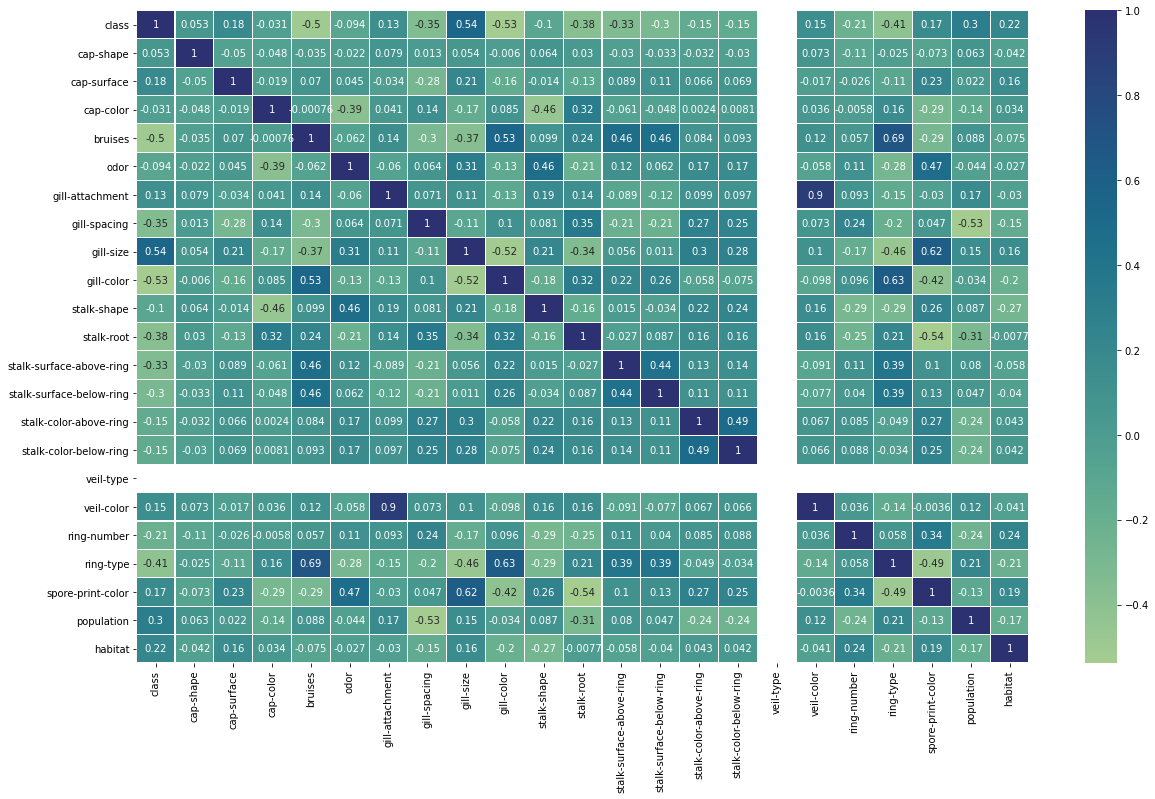

In [41]:
#Visualization with the help of a Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=0.1,cmap="crest", annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0);

In [42]:
#just the vell-type doesn't have any relationship. It can be dropped from the dataset

In [48]:
df = df.drop(["veil-type"],axis=1)


In [49]:
#checking skewness of the dataframe
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [ ]:
#skewness data shows that a few columns are skewed

In [51]:
#as we have the scalled data now, we can use the describe method
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


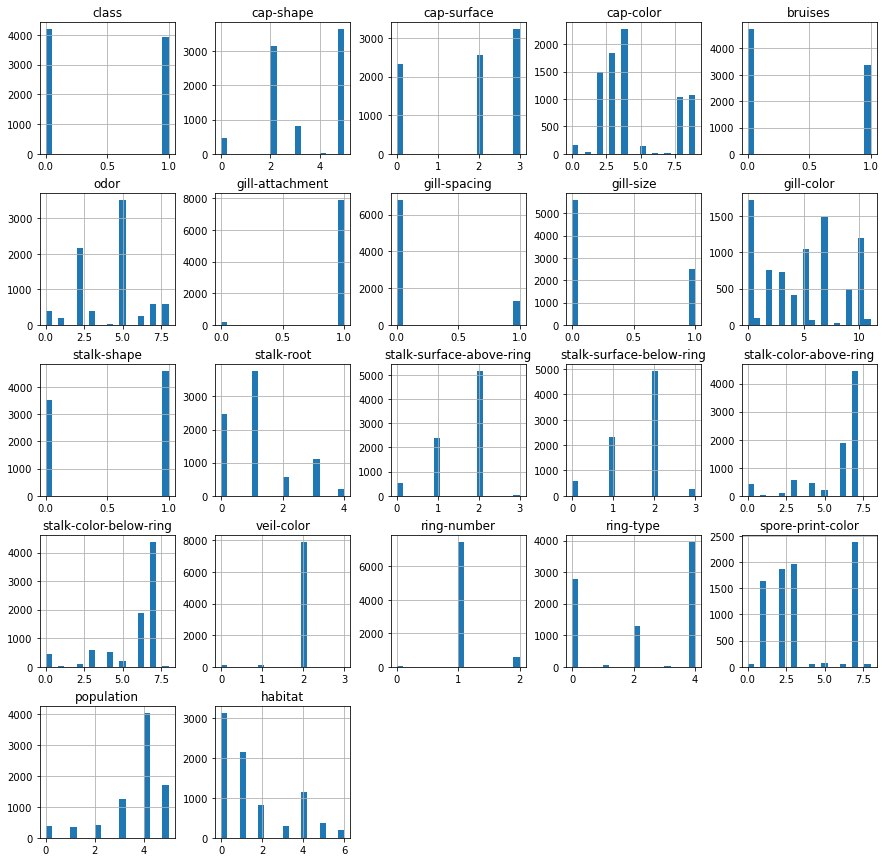

In [53]:
#histogram visaulisation
df.hist(bins=20, figsize=(15,15));


In [54]:
#Creating the training and testing data sets


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state=21, shuffle=False)


In [57]:
# Model Selection

knn_model = KNeighborsClassifier(n_neighbors=15)


In [58]:
#training the model
knn_model.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=15)

In [61]:
# Checking the accuracy scores of the models

predictions_knn = knn_model.predict(X_test)

In [63]:
#importing libraries for models
from sklearn import metrics
from sklearn.metrics import classification_report # to check for precision, recall and f1 score
from sklearn.metrics import accuracy_score # to check the accuracy score upto 16 decimal places
from sklearn.model_selection import cross_val_score # to check for overfitting
from sklearn.model_selection import GridSearchCV # used for hyper parameter tuning

In [64]:
print(f"   Accuracy for K Nearest Neighbors: {accuracy_score(Y_test, predictions_knn)}")


   Accuracy for K Nearest Neighbors: 0.9347692307692308


In [65]:
#checking with another model- random forest this time

In [66]:
rf_model = RandomForestClassifier(max_depth=15, random_state=111)


In [67]:
#training

In [68]:
rf_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=15, random_state=111)

In [69]:
predictions_rf = rf_model.predict(X_test)
print(f"         Accuracy for Random Forest: {accuracy_score(Y_test, predictions_rf)}")


         Accuracy for Random Forest: 0.9944615384615385


In [70]:
#it gives much more accuracy

In [71]:
# Using Cross Validation Score
print(f"Cross Validation Score for K Nearest Neighbors:", cross_val_score(knn_model,X_scaled,Y,cv=10).mean())
print(f"Cross Validation Score for Random Forest:", cross_val_score(rf_model,X_scaled,Y,cv=10).mean())


Cross Validation Score for K Nearest Neighbors: 0.9463443489114693
Cross Validation Score for Random Forest: 0.963216118614388


In [ ]:
#The best model presented by comparing accuracy score, f1 score and cross validation score is "Random Forest"



In [72]:
#Hyper parameter tuning on the best ML Model
# Random Forest Classifier

rf_param = {'n_estimators' : [200,500],
            'min_samples_split' : [3,4,5],
            'max_features' : ['auto','sqrt','log2'],
            'max_depth' : [5,10,15,20],
            'criterion' : ['gini','entropy']}

In [73]:
#Assigning a variable to the Grid Search CV function after entering all the necessary inputs.

GSCV = GridSearchCV(RandomForestClassifier(), rf_param, cv=10)


In [77]:
GSCV.fit(X_train,Y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [200, 500]})

In [75]:
GSCV.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

In [78]:
Final_Model = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', 
                                     min_samples_split=3, n_estimators=400, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
rf_pred = Final_Model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print("Accuracy score for the Best Model is: ", rf_acc*100)

Accuracy score for the Best Model is:  99.81538461538462


# AUC ROC Curve and Confusion Matrix


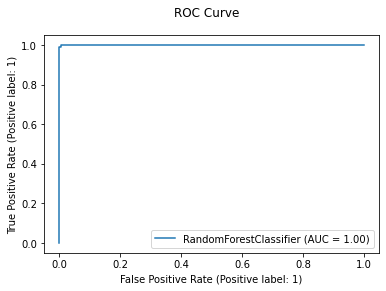

In [79]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [80]:
##The larger the number on AUC results in better performing model which identifies positive and negative classes successfully showcasing the same on a graph.

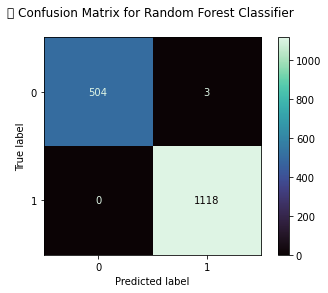

In [81]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako', normalize=None)
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

In [82]:
filename = "FinalModel_1.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_1.pkl']

In [83]:
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)
print(result)

0.9981538461538462
